# Laboratorium 07
## Kwadratury adaptacyjne
Iga Antonik, Helena Szczepanowska

# Zadanie 1
![alt text](img/image.png)

## Rozwiązanie
### Biblioteki

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import trapz, simps, quad, quad_vec

### Definicja funkcji podcałkowej

In [2]:
def f(x):
    return 4 / (1 + x**2)

### Funkcja obliczająca wartość błędu względnego

In [3]:
def relative_error(exact, approx):
    return np.abs((exact - approx) / exact)

### Funkcja obliczająca wartość całki metodą adaptacyjną trapezów

In [4]:
def adaptive_trapezoidal(f, a, b, tol):
    def trapezoidal(f, a, b, N):
        h = (b - a) / N
        x = np.linspace(a, b, N+1)
        y = f(x)
        integral = h * (0.5*y[0] + 0.5*y[-1] + np.sum(y[1:-1]))
        return integral

    N = 1
    current_integral = trapezoidal(f, a, b, N)
    error = np.inf
    evaluations = N + 1

    while error > tol:
        N *= 2
        refined_integral = trapezoidal(f, a, b, N)
        error = abs(refined_integral - current_integral) / abs(refined_integral)
        current_integral = refined_integral
        evaluations += N + 1

    return current_integral, evaluations

### Obliczanie wartości całek metodą trapezów, Simpsona oraz punktu środkowego

In [5]:
# Zakres wartości m
m_values = np.arange(1, 26)

# Listy przechowujące błędy dla każdej metody
errors_trapezoidal = []
errors_simpson = []
errors_midpoint = []
integral = []
# Pętla obliczająca wartości całek i błędów dla różnych wartości m
for m in m_values:
    n = 2 ** m + 1
    x = np.linspace(0, 1, n)
    y = f(x)
        
    # Metoda trapezów
    integral_trapezoidal = trapz(y, x)
    error_trapezoidal = relative_error(np.pi, integral_trapezoidal)
    errors_trapezoidal.append(error_trapezoidal)
        
    # Metoda Simpsona
    integral_simpson = simps(y, x)
    error_simpson = relative_error(np.pi, integral_simpson)
    errors_simpson.append(error_simpson)
        
    # Metoda punktu środkowego
    x_mid = (x[1:] + x[:-1]) / 2
    y_mid = f(x_mid)
    integral_midpoint = np.sum(y_mid * (x[1:] - x[:-1]))
    error_midpoint = relative_error(np.pi, integral_midpoint)
    errors_midpoint.append(error_midpoint)

print('Final integral values: ', integral_trapezoidal,integral_simpson,integral_midpoint)

n_values = 2**m_values +1

Final integral values:  3.1415926535898016 3.1415926535897865 3.141592653589802


### Obliczenie wartości całek dla metod adaptacyjnych trapezów i Gaussa-Kronroda

In [6]:

a, b = 0, 1 
tolerances = np.logspace(0, -14, num=15, base=10)
results_trap = []
results_gauss = []
exact_value = np.pi

for tol in tolerances:

    integral_trap, evals_trap = adaptive_trapezoidal(f, a, b, tol)
    relative_trap = relative_error(exact_value, integral_trap)
    results_trap.append((tol, evals_trap, relative_trap, integral_trap))

    integral_gauss, err, info = quad_vec(f, a, b, epsabs=tol, norm='max', quadrature='gk21', full_output=True)
    relative_gauss = relative_error(exact_value, integral_gauss)
    results_gauss.append((tol, info.neval, relative_gauss, integral_gauss))

evals_trap = [result[1] for result in results_trap]
errors_trap = [result[2] for result in results_trap]

evals_gauss = [result[1] for result in results_gauss]
errors_gauss = [result[2] for result in results_gauss]

integral_trap = [result[3] for result in results_trap]
integral_gauss = [result[3] for result in results_gauss]


# Wykres

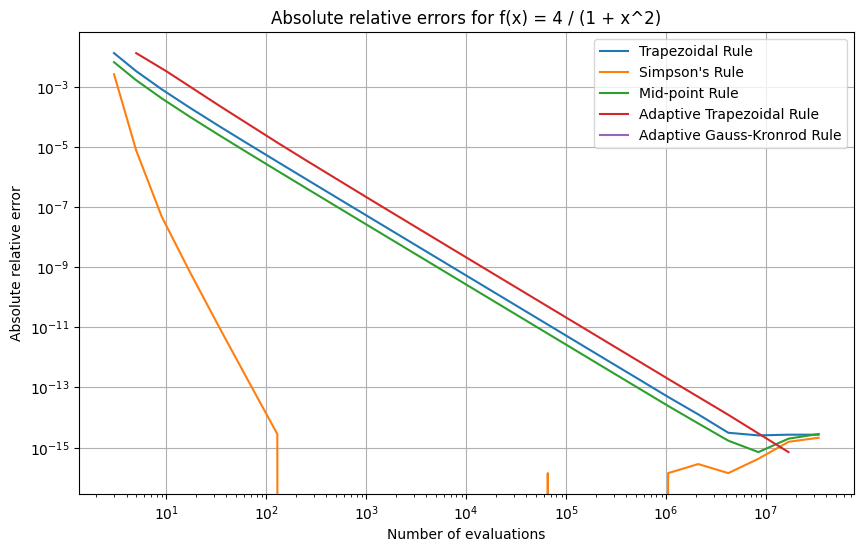

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(n_values, errors_trapezoidal, label='Trapezoidal Rule')
plt.plot(n_values, errors_simpson, label='Simpson\'s Rule')
plt.plot(n_values, errors_midpoint, label='Mid-point Rule')
plt.plot(evals_trap, errors_trap, label='Adaptive Trapezoidal Rule')
plt.plot(evals_gauss, errors_gauss, label='Adaptive Gauss-Kronrod Rule')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Number of evaluations')
plt.ylabel('Absolute relative error')
plt.title('Absolute relative errors for f(x) = 4 / (1 + x^2)')
plt.legend()
plt.grid(True)
plt.show()

## Wnioski
Dla zadanej funkcji metoda kwadratur adaptacyjnych trapezów zwiększa swoją precyzje wraz ze wzrostem liczby ewaluacji funkcji co jest efektem poządanym, jednak w tym przypadku nie jest ona az tak dokładna jak metoda punktu środkowego oraz trapezów. Spośród wszystkich metod najbardziej dokładna jest metoda Gaussa-Kronroda, poniewaz w przypadku tej metody błąd nie występuje wcale niezaleznie od liczby ewaluacji funkcji.

# Zadanie 2

![alt text](img/image-1.png)


## Rozwiązanie

### Funkcje podcałkowe

In [8]:
def f1(x):
    return np.sqrt(x) * np.log(x)


def f2(x):
    term1 = 1 / ((x - 0.3)**2 + 0.001)
    term2 = 1 / ((x - 0.9)**2 + 0.004)
    return term1 + term2 - 6

### Funkcja obliczająca faktyczną wartość całki dla f2(x)

In [9]:
def f2_exact_value(x0, x1, a, b):
    term1 = (np.arctan((1 - x0) / np.sqrt(a)) + np.arctan(x0 / np.sqrt(a))) / np.sqrt(a)
    term2 = (np.arctan((1 - x1) / np.sqrt(b)) + np.arctan(x1 / np.sqrt(b))) / np.sqrt(b)
    return term1 + term2 - 6

### Funkcja obliczająca wartości całek

In [10]:
def count_intergrals(f, a, b, exact_value, title):

    # Zakres wartości m
    m_values = np.arange(1, 26)

    # Listy przechowujące błędy dla każdej metody
    errors_trapezoidal = []
    errors_simpson = []
    errors_midpoint = []

    # Pętla obliczająca wartości całek i błędów dla różnych wartości m
    for m in m_values:
        n = 2 ** m + 1
        x = np.linspace(0, 1, n)
        y = f(x)
        
        # Metoda trapezów
        integral_trapezoidal = trapz(y, x)
        error_trapezoidal = relative_error(exact_value, integral_trapezoidal)
        errors_trapezoidal.append(error_trapezoidal)
        
        # Metoda Simpsona
        integral_simpson = simps(y, x)
        error_simpson = relative_error(exact_value, integral_simpson)
        errors_simpson.append(error_simpson)
        
        # Metoda punktu środkowego
        x_mid = (x[1:] + x[:-1]) / 2
        y_mid = f(x_mid)
        integral_midpoint = np.sum(y_mid * (x[1:] - x[:-1]))
        error_midpoint = relative_error(exact_value, integral_midpoint)
        errors_midpoint.append(error_midpoint)
    
   
    n_values = 2**m_values +1

    # Wyliczenie wartości całek i błędów dla metod adaptacyjnych trapezów i Gaussa-Kronroda dla tolerancji od 1 do 10^-14
    a, b = 0, 1 
    tolerances = np.logspace(0, -14, num=14, base=10)
    results_trap = []
    results_gauss = []

    for tol in tolerances:

        integral_trap, evals_trap = adaptive_trapezoidal(f, a, b, tol)
        relative_trap = relative_error(exact_value, integral_trap)
        results_trap.append((tol, evals_trap, relative_trap, integral_trap))

        integral_gauss, err, info = quad_vec(f, a, b, epsabs=tol, norm='max', quadrature='gk21', full_output=True)
        relative_gauss = relative_error(exact_value, integral_gauss)
        results_gauss.append((tol, info.neval, relative_gauss, integral_gauss))

    evals_trap = [result[1] for result in results_trap]
    errors_trap = [result[2] for result in results_trap]

    evals_gauss = [result[1] for result in results_gauss]
    errors_gauss = [result[2] for result in results_gauss]

    print('Final integral values: ', integral_trapezoidal,integral_simpson,integral_midpoint, integral_trap, integral_gauss)

    # Rysowanie wykresu
    plt.figure(figsize=(10, 6))
    plt.plot(n_values, errors_trapezoidal, label='Trapezoidal Rule')
    plt.plot(n_values, errors_simpson, label='Simpson\'s Rule')
    plt.plot(n_values, errors_midpoint, label='Mid-point Rule')
    plt.plot(evals_trap, errors_trap, label='Adaptive Trapezoidal Rule')
    plt.plot(evals_gauss, errors_gauss, label='Adaptive Gauss-Kronrod Rule')
    plt.yscale('log')
    plt.xscale('log')
    plt.xlabel('Number of evaluations')
    plt.ylabel('Absolute relative error')
    plt.title('Absolute relative errors for ' + title)
    plt.legend()
    plt.grid(True)
    plt.show()

### Wynik i wykres dla f1(x)

Expected value:  -0.44444444444444475


/var/folders/j0/4w2hc5p557nd02zgl7r_cfnr0000gn/T/ipykernel_82355/2666680541.py:2: RuntimeWarning: divide by zero encountered in log
  return np.sqrt(x) * np.log(x)
/var/folders/j0/4w2hc5p557nd02zgl7r_cfnr0000gn/T/ipykernel_82355/2666680541.py:2: RuntimeWarning: invalid value encountered in multiply
  return np.sqrt(x) * np.log(x)


Final integral values:  nan nan -0.4444444444498915 nan -0.4444444444447074


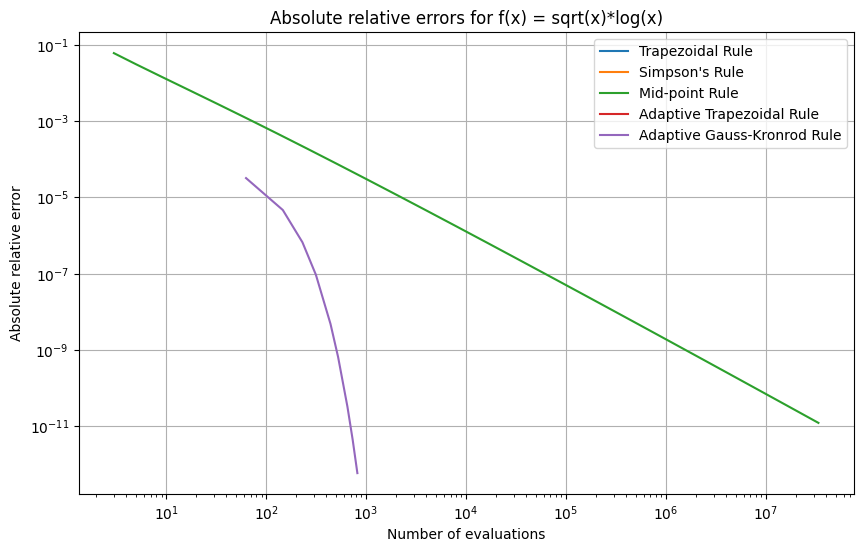

In [11]:
a, b = 0, 1
exact_value_f1 = quad(f1, a, b)[0]
print('Expected value: ', exact_value_f1)
count_intergrals(f1, a, b, exact_value_f1, 'f(x) = sqrt(x)*log(x)' )

## Wnioski

Analizując wyniki oraz wykres dla funkcji f1(x) mozna zobserwować, ze jedynie metody punktów środkowych oraz Gaussa-Kronroda wskazały przyblizoną wartość całki. Jest to spowodowane tym, ze zadana funkcja jest specyficzna przez co w niektórych metodach pojawia się problem dzielenia przez 0 oraz mnozenia razy -inf, poniewaz log(0) zbiega do -inf. Wskazuje to na to, ze nie wszystkie metody są uniwersalne, a ich dobór powinien uwzględniać wszelkie mozliwe problemy wynikające ze charakterystyki funkcji. Jednak ponownie metoda Gaussa-Kronroda okazała się być najskuteczniejszą.

### Wynik i wykres dla f2(x)

Expected value:  128.2441502724197
Final integral values:  128.24415027241994 128.2441502724197 128.24415027242011 128.24415027241938 128.2441502724197


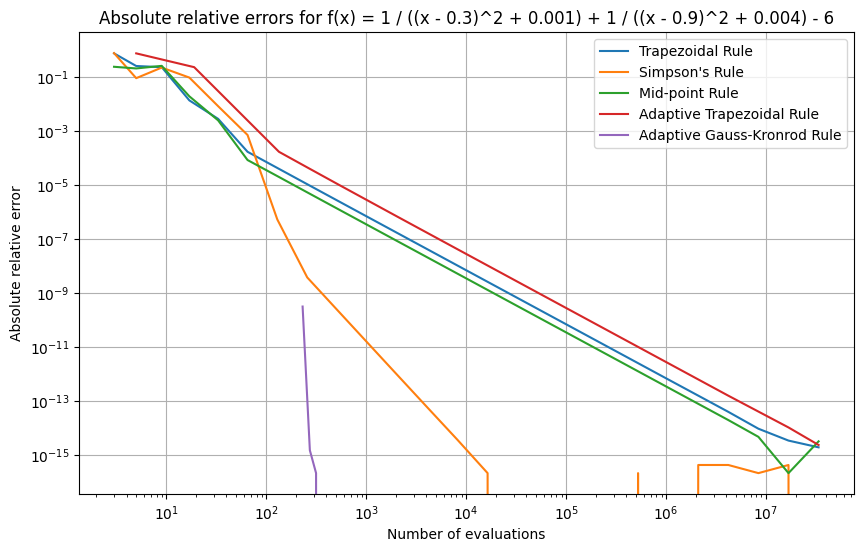

In [12]:
a, b = 0, 1
exact_value_f2 = f2_exact_value(0.3, 0.9, 0.001, 0.004)
print('Expected value: ', exact_value_f2)
count_intergrals(f2, a, b, exact_value_f2, 'f(x) = 1 / ((x - 0.3)^2 + 0.001) + 1 / ((x - 0.9)^2 + 0.004) - 6')


## Wnioski

Z powyzszych wyników oraz wykresu dla funkcji f2(x) wynika, ze wszystkie metody poprawnie przyblizyly wartość całki, jednak ponownie to metoda Gaussa-Kronroda zwróciła najdokładniejszy wynik. Ze wszystkich obserwacji wynika, ze metoda Gaussa-Kronroda jest najbardziej uniwersalna i dokładna.

## Bibliografia

Prezentacja z wykładu nr 5 - kwadratury </br>

https://uwm.edu.pl/wnt/kib/wp-content/uploads/2019/03/08_Ca%C5%82kowanie-numeryczne.ppt</br>

https://home.agh.edu.pl/~funika/mownit/lab5/calkowanie.pdf</br>
